In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
def drop_feature(x, drop_index=-1):
    if drop_index != -1:
        name_list = x.index.values.tolist() #get name of the index
        x = x.drop([name_list[drop_index]],axis=0)
    return x

def gaussian_func(x,mu,s):
    # return np.exp(- np.linalg.norm(mu-x)**2/(2*s*s))
    return np.exp(-(mu-x)**2/(s*s))


def polinomial(x):
    for i in range (len(x)):
        x[i,:] = np.power(x[i,:],i+1)
    return x

def shuffle(x):
    x = np.transpose(x)
    np.random.shuffle(x)
    x = np.transpose(x)
    return x
def data_dividing(x,test_percent):
    test_percent = test_percent
    train_percent = 1 - test_percent
    
    x_test = x[0:len(x)-1,0:round(len(x[1])*test_percent)]
    t_test = x[len(x)-1, 0:round(len(x[1])*test_percent)]
    t_test = np.transpose(t_test)
    # print("x_test.shape",x_test.shape)
    x_train = x[0:len(x)-1,round(len(x[1])*test_percent):len(x[1])]
    t_train = x[len(x)-1,round(len(x[1])*test_percent):len(x[1])]
    t_train = np.transpose(t_train)
    # print("x_train.shape = ", x_train.shape)
    # print("t_train.shape = ", t_train.shape)
    
    return x_test, t_test, x_train, t_train
def data_m2(x_, test_percent=0.1,cross= False):
    target_index = x_.shape[0]-1
    target = x_[target_index,:]
    
    # print("target_index = ",target_index)
    temp = np.zeros((11*11,len(t)))
    # print(temp.shape)
    x_ = np.concatenate((x_,temp),axis=0)
    for k in range(len(t)):
        x_temp = x_[0:11,k]
        for i in range (1,12):
            for j in range (1,12):
                temp = x_temp[i-1]*x_temp[j-1]
                x_[11*i+j-1][k] = temp
    
    if (cross==True):
      return x_ 
    
    test_percent = test_percent
    x_test = x_[:,0:round(x_.shape[1]*test_percent)]
    t_test = target[0:round(x_.shape[1]*test_percent)]
    t_test = np.reshape(t_test,(len(t_test),1))
    
    x_train = x_[:,round(x_.shape[1]*test_percent):x_.shape[1]]
    t_train = target[round(x_.shape[1]*test_percent):x_.shape[1]]
    t_train = np.reshape(t_train,(len(t_train),1))
    
    return x_test, t_test, x_train, t_train

   
   
    
    
def cross_data_dividing(x,i,element_num):
    fold_test = x[:,i*element_num: (i+1)*element_num]
    fold_train = np.delete(x,np.s_[i*element_num:(i+1)*element_num],1)
    
    t_test = fold_test[fold_test.shape[0]-1,:]
    t_test = np.reshape(t_test,(len(t_test),1))
    x_test = np.delete(fold_test,fold_test.shape[0]-1,0)
    
    t_train = fold_train[fold_train.shape[0]-1,:]
    t_train = np.reshape(t_train,(len(t_train),1))
    x_train = np.delete(fold_train,fold_train.shape[0]-1,0)
    
    return x_test, t_test, x_train, t_train

def error_calculating(x,t,w):
    error = 0 
    
    
    for i in range(x.shape[1]):
        temp = x[:,i]
       
        temp = np.array(temp)
        temp = temp.reshape(-1,1)
        predict_ = np.dot(w.transpose(),temp)
        
        error = error + 1/2*np.power((predict_ - t[i]),2)
        # print(t_test[i])
        
        
    
    error_rms = np.sqrt(2*error/(x.shape[1]))
    return error_rms

def part_of_main(x_test, t_test, x_train, t_train,basis_func_type,regularization):
    
    
    if basis_func_type == "gaussian":
        # x = data.transpose()
        mu_train = np.mean(x_train)
        s_train  = np.std(x_train) # recheck again
        x_train = gaussian_func(x_train,mu_train,s_train)
        
        mu_test = np.mean(x_test)
        s_test  = np.std(x_test) # recheck again
        x_test = np.vectorize(gaussian_func)(x_test,mu_test,s_test)
        # print("x.shape",x.shape)
        # print('gaussian')
    
    if basis_func_type == "sigmoid":
        x_train = 1/(1+np.exp(-x_train))
        x_test = 1/(1+np.exp(-x_test))
        # print('sigmoid')
    
    
    
    if regularization == True:
        a = np.dot(x_train,x_train.transpose())+np.identity(len(x_train))*100
    
    else:
        a = np.dot(x_train,x_train.transpose())
    
    a = np.linalg.pinv(a)
    
    b = np.dot(x_train,t_train)
    
    w = (np.dot(a,b))
    
    error_rms_train = error_calculating(x_train,t_train,w)
    error_rms_test = error_calculating(x_test,t_test,w)
    
    
    

    error_list[drop_index] = error_rms_test
    # print(error_rms)################
    
    return error_list,error_rms_train, error_rms_test


    
def main_regression(x,regularization = False, shuffle = False, basis_func_type = "polinomial",dividing="normal"):
    if shuffle == True:
        x = np.transpose(x)
        np.random.shuffle(x)
        x = np.transpose(x)
    # x = np.transpose(x)
    # print("x.shape", x.shape)

    test_percent = 0.1
    if dividing == "normal":
        x_test, t_test, x_train, t_train = data_dividing(x,test_percent)
        error_list,error_rms_train,error_rms_test = part_of_main(x_test, t_test, x_train, t_train,basis_func_type,regularization)
        return error_list,error_rms_train,error_rms_test
    elif dividing == "M=2":
        x_test, t_test, x_train, t_train = data_m2(x,test_percent)
        error_list,error_rms_train,error_rms_test = part_of_main(x_test, t_test, x_train, t_train,basis_func_type,regularization)
        return error_list,error_rms_train,error_rms_test
    elif dividing == "cross_validation":
        k = 5
        _data = x
        x_m2 = data_m2(_data,cross=True)
        element_num = round(x.shape[1]/k)
        # 0 - 319 = i*element_num -> (i+1)*element_num - 1
        # 320 - 639
        total_error_rms = 0
        for i in range (k):
           x_test, t_test, x_train, t_train = cross_data_dividing(x,i,element_num)
           error_list,error_rms_train,error_rms_test = part_of_main(x_test, t_test, x_train, t_train,basis_func_type,regularization)
           total_error_rms = total_error_rms + error_rms_test
        
        mean_error_m1 = total_error_rms / k

        total_error_rms = 0
        basis_func_type = "sigmoid"
        for i in range (k):
           x_test, t_test, x_train, t_train = cross_data_dividing(x,i,element_num)
           error_list,error_rms_train,error_rms_test = part_of_main(x_test, t_test, x_train, t_train,basis_func_type= basis_func_type,regularization=False)
           total_error_rms = total_error_rms + error_rms_test
        
        mean_error_sigmoid = total_error_rms / k

        total_error_rms = 0
        basis_func_type = "gaussian"
        for i in range (k):
           x_test, t_test, x_train, t_train = cross_data_dividing(x,i,element_num)
           error_list,error_rms_train,error_rms_test = part_of_main(x_test, t_test, x_train, t_train,basis_func_type= basis_func_type,regularization=False)
           total_error_rms = total_error_rms + error_rms_test
        
        mean_error_gaussian= total_error_rms / k
        # print ("mean_error = ", mean_error_m1) 
        return mean_error_m1, mean_error_sigmoid, mean_error_gaussian
        
    

   
    

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Homework1/X.csv')
t = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Homework1/T.csv')

data = pd.concat([data,t],axis=1)
D = 11


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 2.1 Feature Selection
**2.1 a**


> The code below shows the results of Error_rms for training and testing in case M = 1 and M = 2. We can see that, in most of the cases, the higher order, M=2, would give us smaller errors compared to the errors of M=1. When we apply the pre-trained weight to the train data set, we usually get the smaller error_rms because these data has been seen by the model before. On the contrast, the data of testing has not been seen by the model, which leads to the results of higher error_rms.



In [67]:
#%%
#For M=1 
data_ =data.sample(frac=1)
temp = data_
x_ = temp.transpose()
x_ = np.array(x_)
temp, error_rms_train, error_rms_test = main_regression(x_)
print ("Error_rms_train, error_rms_test for M = 1 are = {}, {}".format(error_rms_train, error_rms_test))

#For M=2
temp = data_
x_ = temp.transpose()
x_ = np.array(x_)
temp, error_rms_train, error_rms_test = main_regression(x_,dividing="M=2")
print ("Error_rms_train, error_rms_test for M = 2 are = {}, {}".format(error_rms_train, error_rms_test))


Error_rms_train, error_rms_test for M = 1 are = [0.65759591], [0.53138046]
Error_rms_train, error_rms_test for M = 2 are = [[0.61748178]], [[0.56016763]]




---


**2.1 b**


> I would try to drop each feature of the input data and calculating the Error_rms then save them in the list. After that, I would plot all of the error in order to compare of these, the one that leads to the largest error would be the most important Fearture of the input data. As we can see in the figure, the error is largest when we drop the index 10, which mean the **Alcohol feature**. 



The Error_rms of testing data when droping the 0 feature is = [0.59752384]
The Error_rms of testing data when droping the 1 feature is = [0.61363439]
The Error_rms of testing data when droping the 2 feature is = [0.59865053]
The Error_rms of testing data when droping the 3 feature is = [0.595349]
The Error_rms of testing data when droping the 4 feature is = [0.59504975]
The Error_rms of testing data when droping the 5 feature is = [0.59860518]
The Error_rms of testing data when droping the 6 feature is = [0.60452992]
The Error_rms of testing data when droping the 7 feature is = [0.60962873]
The Error_rms of testing data when droping the 8 feature is = [0.59868631]
The Error_rms of testing data when droping the 9 feature is = [0.60635306]
The Error_rms of testing data when droping the 10 feature is = [0.65819022]


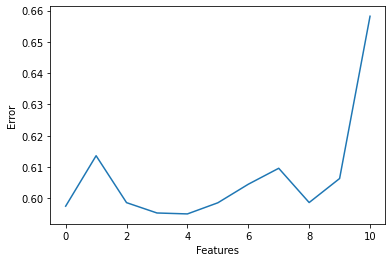

In [115]:
#For M=1
feature_test = True
error_list = np.zeros((D,1))
if feature_test == True:
    temp_data = data.sample(frac=1)
    t = temp_data.iloc[:,11]
    t = np.array(t)
    t = np.reshape(t, (len(t),-1))
    # temp_data = temp_data.drop('quality',axis=1) #drop the index column 
    for drop_index in range (11):
        _data = temp_data.transpose()
        _data = drop_feature(_data,drop_index) #drop each feature to observe which one contributes the most
        
        _data = np.array(_data)
        error_list, temp, temp1 = main_regression(_data)
        print("The Error_rms of testing data when droping the {} feature is = {}".format(drop_index,temp1))
    plt.plot(error_list) #2.1b
    plt.xlabel("Features")
    plt.ylabel("Error")

# **2.2 Maximum likelihood approach**
2.2 ab) The code below will try different basis functions and comparing the result of Error_rms. As we can see from the result, it turns out the error_rms would be the smallest one when the basis function is Polynomial. Since the amount of data that we have is not really complicated, therefore, we can choose the polynomial function to deal with this kind of problem. Since I remember from what professor said in the class. If the problem is easy, the complex model may not give the best result. And by contrast, the complex problem can't be solved by unsophisticated model. As the result, we should test different type of model to find out the best one.

In [114]:
basis_func_test = True
basis_function = ["none","polinomial","gaussian","sigmoid"]
basis_func_type = basis_function[2]
if basis_func_test == True:
    x = data.sample(frac=1)
    x = x.transpose()
    x = np.array(x)
    for i in range (1,4):
        basis_func_type = basis_function[i]
        temp, error_rms_train, error_rms_test = main_regression(x,basis_func_type=basis_func_type)
        print("Error_rms of testing data when using '{}' basis function is {}".format(basis_function[i],error_rms_test))

Error_rms of testing data when using 'polinomial' basis function is [0.67752733]
Error_rms of testing data when using 'gaussian' basis function is [0.6891307]
Error_rms of testing data when using 'sigmoid' basis function is [0.72934853]




---

**2.2 c**


> We will dividing the data into 5 bins for this method and apply this method to compare between the two, "polynomial" "gaussian" and "sigmoid" basis function. As we can see, the polynomial basis function again gives the best result. 



In [113]:
#%% Nfold Cross validation
x =data.sample(frac=1)
x = x.transpose()
x = np.array(x)
mean_error_rms_m1, mean_error_rms_sigmoid, mean_error_rms_gaussian= main_regression(x,dividing="cross_validation")
print("mean_error_rms_m1 = " ,mean_error_rms_m1)
print("mean_error_rms_gaussian = ", mean_error_rms_gaussian)
print("mean_error_rms_sigmoid = ", mean_error_rms_sigmoid)



mean_error_rms_m1 =  [[0.65336991]]
mean_error_rms_gaussian =  [[0.66739306]]
mean_error_rms_sigmoid =  [[0.69044895]]




---

# 2.3 Maximum a posteriori approach



> 2.3a) The key difference is that MAP uses both likelihood and prior while Maximum likelihood doesn't use prior.


>2.3 b c) In the comparison, we see that the Error_rms with regularization gives 0.8210171, meanwhile, the error_rms without regularization is 0.67081066. As the consequence, the results show that the model with regularization does not necessarily sends out the better results.



In [112]:
data_ =data.sample(frac=1)
temp = data_
x_ = temp.transpose()
x_ = np.array(x_)
temp, error_rms_train, error_rms_regularization = main_regression(x_,basis_func_type = "gaussian",regularization=True)
temp, error_rms_train, error_rms_without_reg = main_regression(x_,basis_func_type = "gaussian",regularization=False)
print("Error_rms with regularization is {}".format( error_rms_regularization))
print("Error_rms with wihtout regularization is {}".format(error_rms_without_reg))

Error_rms with regularization is [0.86026683]
Error_rms with wihtout regularization is [0.66717473]
